# Dictionaries and Sets

## Overview

이번장에서는 딕셔너리와 셋을 알아봅니다. built-in 으로는 `dict`, `set`, `frozenset`등이 있고, `collections`에는 `defaultset`, `OrderedDict`등이 있지요. (`collections`에 더 많이 있습니다.)

이번장에서는 이 테이블에 나온 자료구조들을 알아봅니다.

| Type | Collections | Inherits |
|--|--|--|
| dictionary | dict, collections.{UserDict, ChainMap, Counter, OrderedDict} | collections.abc.Mapping |
| set | set, frozenset | collections.abc.Set |

### Python Dictionaries

    Any running Python program has many dictionaries active at the same time, even if the user's program code doesn't explicitly use a dictionary.
    
이게 가능한게, 모든 객체는 dict로 이루어져 있죠. 어떤 라이브러리가 어떤 메소드들이 있는지 궁금하다? 그럼, `dir()`, `vars()`로 시작하시면 됩니다.

In [21]:
dir(__builtins__.__dict__)

['__class__',
 '__contains__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'clear',
 'copy',
 'fromkeys',
 'get',
 'items',
 'keys',
 'pop',
 'popitem',
 'setdefault',
 'update',
 'values']

In [22]:
vars(__builtins__)

{'__name__': 'builtins',
 '__doc__': "Built-in functions, exceptions, and other objects.\n\nNoteworthy: None is the `nil' object; Ellipsis represents `...' in slices.",
 '__package__': '',
 '__loader__': _frozen_importlib.BuiltinImporter,
 '__spec__': ModuleSpec(name='builtins', loader=<class '_frozen_importlib.BuiltinImporter'>),
 '__build_class__': <function __build_class__>,
 '__import__': <function __import__>,
 'abs': <function abs(x, /)>,
 'all': <function all(iterable, /)>,
 'any': <function any(iterable, /)>,
 'ascii': <function ascii(obj, /)>,
 'bin': <function bin(number, /)>,
 'breakpoint': <function breakpoint>,
 'callable': <function callable(obj, /)>,
 'chr': <function chr(i, /)>,
 'compile': <function compile(source, filename, mode, flags=0, dont_inherit=False, optimize=-1)>,
 'delattr': <function delattr(obj, name, /)>,
 'dir': <function dir>,
 'divmod': <function divmod(x, y, /)>,
 'eval': <function eval(source, globals=None, locals=None, /)>,
 'exec': <function exec(s

### What is `hashable`?

`dict`의 key나 `set`의 원소는 hashable 이어야 합니다. 테크니컬하게 `__hash__`를 구현한 것들이 hashable이죠. 정의는 이렇다네요.

    An object is hashable if it has a hash value which never changes during its lifetime (it needs a __hash__() method), and can be compared to other objects (it needs an __eq__() method). Hashable objects which compare equal must have the same hash value. [...]
    
immutable atomic types (`str`, `byte`, etc), `frozenset`, `tuple` 등이 hashable 이라고 합니다.

In [1]:
# tuple은 hashable
t = (1, 2, 3)
print(hash(t))
print(id(t))

# list는 아닙니다
try:
    l = [1, 2, 3]
    print(hash(l))
except TypeError as e:
    print(e)

2528502973977326415
4488973264
unhashable type: 'list'


`dict` 자체도 hashable이 아닙니다. key, value 를 넣었다 뺄수 있으니 당연하지요.

그러면, `dict`을 다른 `dict`의 key로 사용하려면 어떻게 해야 할까요? 구리지만, 다음처럼 할 수는 있습니다.

In [12]:
# dict 을 다른 dict 의 key로...
d = {1:2, 3:4}
key = hash(tuple(sorted(d.items())))

### Example: Group Anagram [Link](https://leetcode.com/problems/group-anagrams/)

`dict`이 다른 `dict`의 key 로 사용되는 경우입니다. 문제를 쉽고 만만하게 봤는데 (실제로 그렇지만), 파이썬에서 dict 을 다른 dict 의 key 로 하는 방법이 까다로워서 좀 헤맸습니다.

Given an array of strings, group anagrams together.

Example:
```
Input: ["eat", "tea", "tan", "ate", "nat", "bat"],
Output:
[
  ["ate","eat","tea"],
  ["nat","tan"],
  ["bat"]
]
```
Note:
- All inputs will be in lowercase.
- The order of your output does not matter.

In [13]:
from collections import defaultdict, Counter
from typing import List

def group_anagrams(strs: List[str]) -> List[List[str]]:
    # 이게 그 힘들게 dict 를 hashable 한겁니다.
    def get_hash(counter):
        return hash(tuple(sorted(list(dict(counter).items()))))

    out = defaultdict(list)
    for s in strs:
        out[get_hash(Counter(s))].append(s)

    return list(out.values())
group_anagrams(["eat", "tea", "tan", "ate", "nat", "bat"])

[['eat', 'tea', 'ate'], ['tan', 'nat'], ['bat']]

In [20]:
from collections import defaultdict
from typing import List

def group_anagrams2(strs: List[str]) -> List[List[str]]:
    def get_counter(s):
        # counter 를 list 로 만든후에 tuple 로 만들면 쉽게 hashable 이죠.
        counter = [0] * 26
        for c in s:
            counter[ord(c)-ord('a')] += 1
        return counter
    
    out = defaultdict(list)
    for s in strs:
        out[tuple(get_counter(s))].append(s)

    return list(out.values())
group_anagrams2(["eat", "tea", "tan", "ate", "nat", "bat"])

[['eat', 'tea', 'ate'], ['tan', 'nat'], ['bat']]

## Special handling for missing keys

`d[k]`를 해서 값이 없을때에 기본 값으로 주는 방법이 두가지가 있습니다: `setdefault()`이나 `collections.defaultdict`. 이미 위의 아나그램 문제에서 `defaultdict`을 잘 썼지만, 다른 문제를 하나 더 보겠습니다.

특별 함수 중 `__missing__`이 값이 없는 상황을 다룹니다. 관심이 있으시면 책을 읽어주세요.

### Example: Word Ladder [Link](https://leetcode.com/problems/word-ladder/)

`defaultdict`을 사용하는 문제입니다. 

Given two words (beginWord and endWord), and a dictionary's word list, find the length of shortest transformation sequence from beginWord to endWord, such that:

1. Only one letter can be changed at a time.
2. Each transformed word must exist in the word list. Note that beginWord is not a transformed word.

Note:
- Return 0 if there is no such transformation sequence.
- All words have the same length.
- All words contain only lowercase alphabetic characters.
- You may assume no duplicates in the word list.
- You may assume beginWord and endWord are non-empty and are not the same.

Example 1:

Input:
- beginWord = "hit",
- endWord = "cog",
- wordList = ["hot","dot","dog","lot","log","cog"]

Output: 5

Explanation: As one shortest transformation is "hit" -> "hot" -> "dot" -> "dog" -> "cog",
return its length 5.

In [7]:
import collections
from typing import List

def ladder_length(beginWord: str, endWord: str, wordList: List[str]) -> int:
    if not wordList:
        return 0

    word_len = len(wordList[0])
    word_dict = collections.defaultdict(list) # 이런식으로 자주 씁니다.
    for word in wordList:
        for i in range(word_len):
            word_dict['_'.join([word[:i], word[i+1:]])].append(word)
            # 이런식으로도 쓸 수 있죠.
            # word_dict.setdefault('_'.join([word[:i], word[i+1:]]), []).append(word)
    visited = set([beginWord])
    queue = collections.deque([(beginWord, 1)])

    while queue:
        word, count = queue.popleft()
        if word == endWord:
            return count
        for i in range(word_len):
            next_cand = '_'.join([word[:i], word[i+1:]])
            if next_cand in word_dict:
                next_words = [word for word in word_dict[next_cand] if word not in visited]
                if next_words:
                    visited.update(next_words)
                    queue.extend([(word, count+1) for word in next_words])

    return 0

print(ladder_length('hit', 'cog', ["hot","dot","dog","lot","log","cog"]))
print(ladder_length('hit', 'cog', ["hot","dot","dog","lot","log"]))

5
0


## Variations of dict in the standard library

| Library | 설명 / 예제 |
|--|--|
| OrderedDict | Used for LRUCache below |
| ChainMap | import builtins; pylookup = ChainMap(locals(), globals(), vars(builtins))|
| Counter | Counter('abracadabra') |
| UserDict | A pure Python implementation of a mapping that works like a standard dict |

### Example: LRU Cache [Link](https://leetcode.com/problems/lru-cache/)

Leetcode 의 가장 상단에 있는 문제인 LRU Cache 입니다. 최적의 해는 List + Map 을 써서 search, insert, delete 모두 `O(1)`에 만드는 것이죠.

언어별로 라이브러리를 쓰면 구현이 굉장히 쉬울 수 있습니다. 파이썬은 `OrderedDict`, 자바는 `LinkedHashMap`을 쓰면 되죠.

사실, 함수에 annotation 으로 사용되는 `functools.lru_cache`라는 구현도 이미 있습니다. (7장에서 알아보겠습니다.)

In [9]:
import collections

class LRUCache:
    def __init__(self, capacity: int):
        self.dict = collections.OrderedDict()
        self.capacity = capacity
        
    def get(self, key: int) -> int:
        if key not in self.dict:
            return -1
            
        self.dict.move_to_end(key)
        return self.dict[key]
        
    def put(self, key: int, value: int) -> None:
        self.dict[key] = valueㄴ
        self.dict.move_to_end(key)
        
        if len(self.dict) > self.capacity:
            self.dict.popitem(last=False)

Python 3.5 이상에서는 `dict`도 keep ordering 합니다. 하지만, 위처럼 LRUCache는 만들수가 없는데요. `move_to_end()`, `popitem(last)` 가 없기 때문입니다.

## Other things about `dict`
- 새로운 딕셔너리 클래스를 만들고 싶다면 `dict`보다는 `collections.UserDict`를 상속하라네요.
- Immutable dict를 만들고 싶으면 `types.MappingProxyType`을 쓰면 된다고 합니다.

In [24]:
from types import MappingProxyType
d = {1: 'A'}
d_proxy = MappingProxyType(d)
print(d_proxy)
try:
    d_proxy[2] = 'x'
except TypeError as e:
    print(e)

{1: 'A'}
'mappingproxy' object does not support item assignment


## `set` and `frozenset`
- List comp, Dict comp, Set comp 는 간단하니 생략하겠습니다.
- `frozenset`은 immutable 이구요.
- `set`을 초기화 할때에는 `{1}` 이라고 하는게 `set([1])`보다 빠르네요.

In [25]:
from dis import dis
print(dis('{1}'))
print(dis('set([1])'))

  1           0 LOAD_CONST               0 (1)
              2 BUILD_SET                1
              4 RETURN_VALUE
None
  1           0 LOAD_NAME                0 (set)
              2 LOAD_CONST               0 (1)
              4 BUILD_LIST               1
              6 CALL_FUNCTION            1
              8 RETURN_VALUE
None


## Performance of `dict` and `set`
Find needle in haystack 실험을 해봅니다. 결과는 다음과 같습니다.

In [26]:
# https://github.com/fluentpython/example-code/blob/master/03-dict-set/support/container_perftest_datagen.py

"""
Generate data for container performance test
"""

import random
import array

MAX_EXPONENT = 7
HAYSTACK_LEN = 10 ** MAX_EXPONENT
NEEDLES_LEN = 10 ** (MAX_EXPONENT - 1)
SAMPLE_LEN = HAYSTACK_LEN + NEEDLES_LEN // 2

needles = array.array('d')

sample = {1/random.random() for i in range(SAMPLE_LEN)}
print('initial sample: %d elements' % len(sample))

# complete sample, in case duplicate random numbers were discarded
while len(sample) < SAMPLE_LEN:
    sample.add(1/random.random())

print('complete sample: %d elements' % len(sample))

sample = array.array('d', sample)
random.shuffle(sample)

not_selected = sample[:NEEDLES_LEN // 2]
print('not selected: %d samples' % len(not_selected))
print('  writing not_selected.arr')
with open('not_selected.arr', 'wb') as fp:
    not_selected.tofile(fp)

selected = sample[NEEDLES_LEN // 2:]
print('selected: %d samples' % len(selected))
print('  writing selected.arr')
with open('selected.arr', 'wb') as fp:
    selected.tofile(fp)

initial sample: 10500000 elements
complete sample: 10500000 elements
not selected: 500000 samples
  writing not_selected.arr
selected: 10000000 samples
  writing selected.arr


In [29]:
# https://github.com/fluentpython/example-code/blob/master/03-dict-set/support/container_perftest.py
    
"""
Container ``in`` operator performance test
"""
import sys
import timeit

SETUP = '''
import array
selected = array.array('d')
with open('selected.arr', 'rb') as fp:
    selected.fromfile(fp, {size})
if {container_type} is dict:
    haystack = dict.fromkeys(selected, 1)
else:
    haystack = {container_type}(selected)
if {verbose}:
    print(type(haystack), end='  ')
    print('haystack: %10d' % len(haystack), end='  ')
needles = array.array('d')
with open('not_selected.arr', 'rb') as fp:
    needles.fromfile(fp, 500)
needles.extend(selected[::{size}//500])
if {verbose}:
    print(' needles: %10d' % len(needles), end='  ')
'''

TEST = '''
found = 0
for n in needles:
    if n in haystack:
        found += 1
if {verbose}:
    print('  found: %10d' % found)
'''

def test(container_type, verbose):
    MAX_EXPONENT = 7
    for n in range(3, MAX_EXPONENT + 1):
        size = 10**n
        setup = SETUP.format(container_type=container_type,
                             size=size, verbose=verbose)
        test = TEST.format(verbose=verbose)
        tt = timeit.repeat(stmt=test, setup=setup, repeat=5, number=1)
        print('|{:{}d}|{:f}'.format(size, MAX_EXPONENT + 1, min(tt)))

test('dict', False)
test('set', False)
test('list', False)

|    1000|0.000150
|   10000|0.000090
|  100000|0.000153
| 1000000|0.000298
|10000000|0.000499
|    1000|0.000084
|   10000|0.000093
|  100000|0.000146
| 1000000|0.000224
|10000000|0.000339
|    1000|0.006553
|   10000|0.067543
|  100000|0.688339
| 1000000|6.922648
|10000000|68.989036


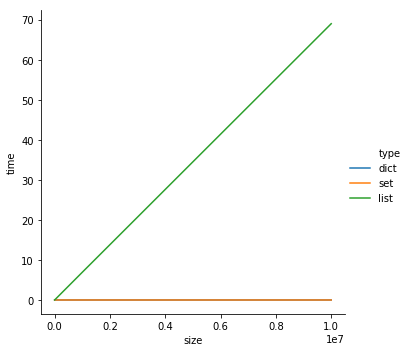

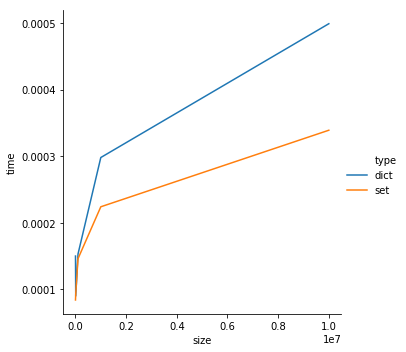

In [16]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

result = '''|    1000|0.000150
|   10000|0.000090
|  100000|0.000153
| 1000000|0.000298
|10000000|0.000499
|    1000|0.000084
|   10000|0.000093
|  100000|0.000146
| 1000000|0.000224
|10000000|0.000339
|    1000|0.006553
|   10000|0.067543
|  100000|0.688339
| 1000000|6.922648
|10000000|68.989036'''.split('|')
result = list(map(lambda i: float(i.strip()), filter(None, result)))
result = np.array(result).reshape(15, 2)

df = pd.DataFrame(result, columns=['size', 'time'])
df['type'] = np.where(df.index < 5, 'dict', np.where(df.index < 10, 'set', 'list'))
sns.relplot(x='size', y='time', hue='type', kind='line', data=df);
sns.relplot(x='size', y='time', hue='type', kind='line', data=df[df.type != 'list']);

`dict`, `set`은 아주 약간의 차이가 있지만 둘다 엄청 빠르고, 검색이 중요할때 `list`를 쓰면 절대 안되겠다는 결론.

마지막 섹션에서 더 논의합니다.

### Hash table 원리

- 보통 1/3 버켓은 empty상태가 되도록 유지
- key가 조금만 바뀌어도 해쉬값들은 엄청나게 바뀜 ([실험](https://github.com/fluentpython/example-code/blob/master/03-dict-set/support/hashdiff.py))

Insert 하기

1. key에 대해서 `hash(key)` 를 불러서 아래 특정 몇 byte 만 사용해서 버켓을 찾습니다.
2. 버켓이 비었으면 넣기.
3. 버켓이 차있으면 해쉬값의 다른 byte 들을 사용해서 버켓을 찾고, 찾고 계속해서 빈 버켓에 넣는답니다.

## Practical consequences

Practical consequences of `dict`

    1. Keys must be hashable
    2. dict has significant memory overhead
    3. Key search is very fast
    4. Key ordering depends on insertion order
    5. Adding items to a dict may change orderings of existing keys
    
Practical consequences of `set`. Basically, same with dict's
    
    1. Set elements must be hashable
    2. set has significant memory overhead
    3. Membership testing is very fast
    4. Element ordering depends on insertion order
    5. Adding items to a set may change orderings of other elements